# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Brillian Syifa Qolbi
- **Email:** brillian354@gmail.com
- **ID Dicoding:** mbrillian354

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan di E-Commerce pada tahun 2017 s.d. 2018
- Kategori apa dengan jumlah penjualan terbanyak
- Bagaimana demografi pembeli

## Import Semua Packages/Library yang Digunakan

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import shutil

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Menyalin data dari drive ke vm agar tidak memodifikasi data original

In [3]:
try:
  shutil.rmtree('/content/data')
  shutil.copytree('/content/drive/MyDrive/Colab Notebooks/data/Dicoding_Data_Analysis', '/content/data')
except:
  shutil.copytree('/content/drive/MyDrive/Colab Notebooks/data/Dicoding_Data_Analysis', '/content/data')

In [4]:
df_items = pd.read_csv("/content/data/order_items_dataset.csv")
df_orders = pd.read_csv("/content/data/orders_dataset.csv")
df_products = pd.read_csv("/content/data/products_dataset.csv")
df_payments = pd.read_csv("/content/data/order_payments_dataset.csv")
df_customers = pd.read_csv("/content/data/customers_dataset.csv")
df_category = pd.read_csv("/content/data/product_category_name_translation.csv")

### Assessing Data

Assessing datatypes, duplicates, and missing values

In [5]:
df_dict = {'df_items': df_items, 'df_orders': df_orders, 'df_products': df_products,
           'df_payments': df_payments, 'df_customers': df_customers, 'df_category': df_category}

df_dict = dict(sorted(df_dict.items()))


for name, df in df_dict.items():
    print(f"Dataset of {name}")
    print(f'{df.info()}\n')
    print(f'Duplicates:\n{df.duplicated().sum()}\n')
    print(f'Missing Values:\n{df.isna().sum()}\n')
    print(''.join(["=" for i in range(75)]))

Dataset of df_category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Duplicates:
0

Missing Values:
product_category_name            0
product_category_name_english    0
dtype: int64

Dataset of df_customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state   

Ditemukan missing values pada df_orders

In [6]:
df_orders[(df_orders['order_status'] == 'delivered') & (df_orders['order_delivered_customer_date'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


Assessing Inaccurate Values

In [7]:
df_dict_desc = {'df_items': df_items, 'df_payments': df_payments,'df_category': df_category}

df_dict_desc = dict(sorted(df_dict_desc.items()))

for name, df in df_dict_desc.items():
    print(f"Dataset of {name}")
    print(df.describe())
    print(''.join(["=" for i in range(75)]))


Dataset of df_category
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1
Dataset of df_items
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
Dataset of df_payments
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     15

Ditemukan anomali pada kolom `payment_sequential` di dataset `df_payments`. Max valuenya 29 dan min valuenya 1. Namun sebaran di 25%, 50%, dan 75% adalah 1.

In [8]:
df_payments[df_payments['payment_sequential'] == df_payments['payment_sequential'].max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [9]:
df_payments.sort_values(by='payment_sequential', ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26
39111,fa65dad1b0e818e3ccc5cb0e39231352,28,voucher,1,29.05
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
79587,fa65dad1b0e818e3ccc5cb0e39231352,26,voucher,1,28.27
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
99213,fa65dad1b0e818e3ccc5cb0e39231352,24,voucher,1,0.42
51816,ccf804e764ed5650cd8759557269dc13,24,voucher,1,2.79
85166,fa65dad1b0e818e3ccc5cb0e39231352,23,voucher,1,18.86


In [10]:
df_payments.groupby(by='payment_sequential').agg({
    'order_id': 'nunique'
})

,order_id
payment_sequential,
1,99360
2,3039
3,581
4,278
5,170
6,118
7,82
8,54
9,43


Rupanya hanyalah faktor distribusi yang skewed.

**Assessing Result**

| |              |Tipe Data|Missing Value|Duplicate Data|Inaccurate Value|
|-|--------------|-------- |-------------|--------------|----------------|
|1|df_category   |         |
|2|df_customers  |         |
|3|df_items      |Kesalahan tipe pada: <br /> shipping_limit_date  
|4|df_orders     |Kesalahan tipe pada 5 column|missing values on 3 columns
|5|df_payments   |
|6|df_products   |         | missing values|


### Cleaning Data

**df_items**

Memperbaiki kesalahan tipe data

In [11]:
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])

In [12]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**df_orders**

Memperbaiki kesalahan tipe data

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
df_orders_datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',  'order_estimated_delivery_date']

for column in df_orders_datetime_cols:
  df_orders[column] = pd.to_datetime(df_orders[column])

In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengatasi missing values

In [16]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
df_orders[(df_orders['order_approved_at'].isna()) & (df_orders['order_status'] == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [18]:
df_orders[(df_orders['order_approved_at'].isna()) & (df_orders['order_status'] == 'canceled')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [19]:
df_orders_tmp = df_orders[df_orders['order_status'] == 'delivered'].dropna()

df_orders_tmp2 = df_orders[df_orders['order_status'] != 'delivered']

df_orders = pd.concat([df_orders_tmp, df_orders_tmp2], ignore_index=True)

Row dengan status `delivered` yang terdapat missing values di-drop.

Row dengan status selain `delivered`, yaitu order yang belum dan/atau tidak terkirim tetap dibiarkan.

In [20]:
df_orders.groupby(by='order_status').agg({'order_id':'nunique'}).sort_values(by='order_id', ascending=False)

,order_id
order_status,
delivered,96455
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**df_products**

Mengatasi missing values

In [21]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [22]:
df_products.product_category_name.value_counts().head(10)

cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_category_name, dtype: int64

In [23]:
df_products[df_products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [24]:
df_products[df_products['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_products['product_category_name'].fillna('Unknown', inplace=True)

df_products_na = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in df_products_na:
  df_products[col].fillna(df_products[col].mean(), inplace=True)

Missing values pada kolom `product_category_name` diisi dengan `unknown`. Sisanya diisi dengan value rata-rata kolom masing-masing.

In [26]:
df_products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### 1. Explore df_category

In [27]:
df_category.sample(5)

,product_category_name,product_category_name_english
5,esporte_lazer,sports_leisure
30,moveis_escritorio,office_furniture
66,flores,flowers
65,dvds_blu_ray,dvds_blu_ray
9,relogios_presentes,watches_gifts


In [28]:
df_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 2. Explore df_products

In [29]:
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27735,61a4100ccd6d9c4c808a1fd954ddb8ad,eletroportateis,60.0,3839.0,4.0,1450.0,24.0,24.0,24.0
1728,eeb140d5f26a24f9920969845deb6b4b,utilidades_domesticas,29.0,850.0,2.0,600.0,16.0,12.0,12.0
18793,1ba039173f93b4ad2c34545eb1f64f24,beleza_saude,50.0,784.0,1.0,1000.0,30.0,15.0,30.0
12075,8acbb05460d726307368e3fd43470285,casa_construcao,60.0,907.0,4.0,9950.0,52.0,22.0,52.0
6553,a81fc5e66120ebdb295873f74a45c5b7,cama_mesa_banho,49.0,528.0,2.0,2350.0,33.0,8.0,33.0


In [30]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [31]:
df_products.groupby(by='product_category_name').agg({"product_id": "nunique"}).sort_values(by='product_id', ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


### 3. Explore df_item

In [32]:
df_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
42051,5fc0077c7ba092d24743a55d05cad3fa,1,6beae1a9c914c4e2ca45868d6317a27e,7142540dd4c91e2237acb7e911c4eba2,2017-11-17 21:06:46,84.90,13.61
39445,59ad806bb1a82c19e0feadc488939a89,2,d363e421b1d15376b299089946fed127,870d0118f7a9d85960f29ad89d5d989a,2017-11-30 12:17:30,46.99,17.97
6492,0eb943e25686a73425894fcc95e842e3,2,57f2bc497c1a3ebe41ba7a06d78ed159,6560211a19b47992c3666cc44a7e94c0,2018-08-20 09:10:14,55.00,3.87
110129,fa3e37584f4fdb1ded0e0de700dfcb4e,1,4954affcf6b8e0fbd3b4780a9baab238,d12c926d74ceff0a90a21184466ce161,2017-08-03 19:45:09,44.70,1.61
49547,7097d0ede6ff53506d935488dbe68d0e,1,f2ecbb02b6da187a9f14b8ac5781faec,3c7c4a49ec3c6550809089c6a2ca9370,2018-03-07 18:09:41,13.99,7.78


In [33]:
df_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [34]:
df_items.sort_values(by="price", ascending=False).head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34


### 4. Explore df_orders

In [35]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99418 entries, 0 to 99417
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99418 non-null  object        
 1   customer_id                    99418 non-null  object        
 2   order_status                   99418 non-null  object        
 3   order_purchase_timestamp       99418 non-null  datetime64[ns]
 4   order_approved_at              99272 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97637 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99418 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [36]:
df_orders[df_orders['order_status'] == 'delivered'].sort_values(by='order_purchase_timestamp', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
85446,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05
67588,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03
30546,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11
29188,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04
96384,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03
...,...,...,...,...,...,...,...,...
85810,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23
95037,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29
27591,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07
90489,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27


In [37]:
df_orders.agg({'order_id':'nunique'})

order_id    99418
dtype: int64

In [38]:
print(f"Successful deliveries:\n{df_orders[df_orders['order_status'] == 'delivered'].shape[0]}")
print(f"Canceled deliveries:\n{df_orders[df_orders['order_status'] == 'canceled'].shape[0]}")
print(f"Others:\n{df_orders[(df_orders['order_status'] != 'canceled') & (df_orders['order_status'] != 'delivered')].shape[0]}")

Successful deliveries:
96455
Canceled deliveries:
625
Others:
2338


In [39]:
delivery_time = df_orders["order_delivered_carrier_date"] - df_orders["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
df_orders["delivery_time_days"] = round(delivery_time/86400)

estimeted_diff = df_orders["order_estimated_delivery_date"].dt.date - df_orders["order_delivered_carrier_date"].dt.date
# estimeted_diff = delivery_time.apply(lambda x: x.total_seconds())
df_orders["estimated_diff"] = estimeted_diff

In [40]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,estimated_diff
78627,94781b7e571ded2ff6f80434f6fe2a43,4442ce3a2d4bb4bc6c5752a8dfb37806,delivered,2017-09-25 13:55:03,2017-09-25 14:06:10,2017-09-27 18:58:38,2017-10-04 18:58:42,2017-10-20,2.0,23 days
79007,e223ccde32fd470414931d963b07c4f8,984e03c38bf2c163791fa3d61a002a01,delivered,2018-08-16 21:42:49,2018-08-16 21:55:47,2018-08-17 14:04:00,2018-08-29 16:08:37,2018-08-27,1.0,10 days
76298,3517c4c24184e3c518a1c8319dc60765,7d33b236218941a7bca694abb998eeda,delivered,2017-09-06 11:16:05,2017-09-06 11:25:21,2017-09-06 19:10:09,2017-09-19 21:17:41,2017-09-28,0.0,22 days
85234,385419e97be72d63a6bf3c005c838df2,8cb56399bb0ca3ae0549dae672b8caa1,delivered,2017-11-22 14:05:45,2017-11-22 14:17:36,2017-11-23 20:18:56,2017-11-27 16:56:35,2017-12-04,1.0,11 days
9310,bb50a28145ecd1a42277631daa877711,39d88d9deb2cbd4dac8469627360099f,delivered,2018-08-14 15:21:52,2018-08-15 03:10:32,2018-08-17 13:53:00,2018-08-27 17:41:21,2018-08-31,2.0,14 days


In [41]:
df_orders[df_orders['estimated_diff'] <= '0'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,estimated_diff
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,18.0,-8 days
100,a5474c0071dd5d1074e12d417078bbd0,ef15b3240b2083e0487762ee2978d2b8,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,1.0,0 days
689,234c056c50619f48da64f731c48242b4,44e460a655f7154ccd9faa4dbbbaf68a,delivered,2018-08-14 14:49:15,2018-08-15 03:15:15,2018-08-31 15:25:00,2018-09-01 18:14:42,2018-08-23,17.0,-8 days
730,4190ab61a7fced69f3ee84d1da1120cc,3df7ff0b86935d5249e4d6cd56b89131,delivered,2017-12-08 11:38:00,2017-12-09 02:36:21,2018-01-12 00:35:33,2018-01-31 19:08:40,2018-01-11,34.0,-1 days
732,a06c43ed81f5c604287461f4d21949ce,da82d24c21654f951fedc813df8a5dc6,delivered,2017-10-24 17:39:10,2017-10-24 17:56:20,2017-11-20 21:15:00,2017-11-23 21:48:41,2017-11-17,27.0,-3 days


### 5. Explore df_customers

In [42]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [43]:
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58569,711fff4266b53bae9de25be1473dc0bc,62a459e5629b03dd73134964df732077,69903,rio branco,AC
93267,1e7b6cc033a72b59bd69c4a3f3a382c3,b3a6549b3cd47a7117094faafce8b10d,6036,osasco,SP
75376,25b649c6c09ea11139ef9c010e95082b,43bbe1b52258f430e2b8f4a31f4cbf25,88101,sao jose,SC
8201,8b237ef13fcb07e8c830059ca4d7b1ee,8c7f90968d1dd891c54bbceea9b34696,14090,ribeirao preto,SP
92390,3208272b8e9b21b56d16be9ec8d03b0a,45157544dfa017094a3babd71fe22c2c,21351,rio de janeiro,RJ


In [44]:
df_customers.groupby(by='customer_state').agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False).head(5)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


In [45]:
df_customers.groupby(by=['customer_state', 'customer_city']).agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False)

customer_id
customer_state customer_city              
SP             sao paulo             15540
RJ             rio de janeiro         6882
MG             belo horizonte         2773
DF             brasilia               2131
PR             curitiba               1521
...                                    ...
RS             cerro grande              1
               cerrito                   1
               caseiros                  1
MG             ipuiuna                   1
AC             brasileia                 1

[4310 rows x 1 columns]

In [46]:
df_customers[df_customers['customer_state'] == 'SP'].groupby(by='customer_city').agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False)

,customer_id
customer_city,
sao paulo,15540
campinas,1444
guarulhos,1189
sao bernardo do campo,938
santo andre,796
...,...
sao sebastiao da serra,1
gabriel monteiro,1
galia,1


### 6. Explore df_payments

In [47]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [48]:
df_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
58253,63897b6705887543f6b7e7a468ff337f,1,boleto,1,93.17
69095,1c851b2d3587fe02888b58c64fbc1ab0,1,credit_card,1,33.11
29977,ea2b2e907341618980eb6f87436f1c4a,1,credit_card,1,57.36
26706,bd8076c7068a60bf3d148350c9ad9975,1,credit_card,10,612.38
94685,7bb355355c075d74665d97db859cfb45,1,credit_card,6,102.96


In [49]:
df_payments.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['sum', 'max', 'min', 'mean', 'std']
    }).sort_values(by= ('order_id', 'nunique'), ascending=False)

order_id payment_value                                         
              nunique           sum       max    min        mean         std
payment_type                                                                
credit_card     76505   12542084.19  13664.08   0.01  163.319021  222.119311
boleto          19784    2869361.27   7274.88  11.62  145.034435  213.581061
voucher          3866     379436.87   3184.34   0.00   65.703354  115.519185
debit_card       1528     217989.79   4445.50  13.38  142.570170  245.793401
not_defined         3          0.00      0.00   0.00    0.000000    0.000000

In [50]:
df_payments.groupby(by='payment_installments').agg({
    'order_id': 'nunique'
    }).sort_values(by= ('order_id'), ascending=False).head(10)

,order_id
payment_installments,
1,49060
2,12389
3,10443
4,7088
10,5315
5,5234
8,4253
6,3916
7,1623


In [51]:
df_payments.groupby(by='payment_sequential').agg({
    'order_id': 'nunique'
    }).sort_values(by= ('order_id'), ascending=False).head(10)

,order_id
payment_sequential,
1,99360
2,3039
3,581
4,278
5,170
6,118
7,82
8,54
9,43


### 7. Explore df_all

In [52]:
df_all = df_orders.merge(df_items, on='order_id', how='left')
df_all = df_all.merge(df_payments, on='order_id', how='outer')
df_all = df_all.merge(df_products, on='product_id', how='outer')
df_all = df_all.merge(df_category, on='product_category_name', how='outer')
df_all = df_all.merge(df_customers, on='customer_id', how='outer')

In [53]:
df_all.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,estimated_diff,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
28522,30d9b6778c881209fbbe2d1fdc6b3aa7,c46fb1ad081f67129badf67837c1727c,delivered,2017-11-30 22:56:51,2017-12-01 10:30:54,2017-12-06 00:58:48,2017-12-14 13:47:06,2017-12-19,5.0,13 days,...,4.0,6050.0,30.0,40.0,30.0,furniture_decor,de2ca7b13e8e419507948976ca8df56c,5794.0,sao paulo,SP
73122,0c78ccb9fbc7e1d41165489050f6b748,5f52309bb03b2be3e499278fe49de656,delivered,2017-06-19 21:58:00,2017-06-19 22:05:16,2017-06-21 13:28:18,2017-06-22 16:42:14,2017-06-30,2.0,9 days,...,1.0,2300.0,26.0,30.0,13.0,health_beauty,9c90157c7b5c4a92c25f1c27a42df017,3947.0,sao paulo,SP
31589,3eff384842f72b3a75f3f8a4b97fdd44,1a6d4833c060a4f4b5e296057be4fa85,delivered,2018-08-09 11:36:36,2018-08-09 19:04:41,2018-08-11 09:12:00,2018-08-17 00:38:36,2018-08-28,2.0,17 days,...,2.0,1750.0,37.0,22.0,40.0,garden_tools,74f1cb6900dadb1afca23c04643b06ce,38742.0,patrocinio,MG
109945,5c08ed25ee3f139b35a21c0c12944802,f999d69f765c22961155f7c9347b3292,delivered,2018-02-07 12:03:51,2018-02-07 12:15:29,2018-02-08 18:50:49,2018-02-19 17:03:52,2018-03-07,1.0,27 days,...,2.0,250.0,18.0,8.0,18.0,market_place,364f7934597f72889dd3e205e8c80778,74223.0,goiania,GO
42072,126571e0640aed9ed9166104b8605bf8,a814d900341ec8788f9787e402d25b17,delivered,2018-03-02 13:46:47,2018-03-02 14:24:02,2018-03-05 18:58:01,2018-03-21 15:27:25,2018-04-02,3.0,28 days,...,2.0,50.0,23.0,12.0,19.0,computers_accessories,2dbc368e40b8b5c488cc4871a891b6b5,66093.0,belem,PA


In [54]:
df_all.groupby(by=['customer_state']).agg({
    'order_id': 'nunique',
    'price': 'sum'
    }).sort_values(by='order_id', ascending=False).head(5)

,order_id,price
customer_state,,
SP,41733,5446473.87
RJ,12850,1913386.17
MG,11632,1639396.03
RS,5463,787078.54
PR,5045,705856.47


In [55]:
df_all.groupby(by=['product_category_name_english']).agg({
    'order_id': 'nunique',
    'price': 'sum'
    }).sort_values(by='order_id', ascending=False).head(5)

,order_id,price
product_category_name_english,,
bed_bath_table,9416,1092417.03
health_beauty,8836,1297490.77
sports_leisure,7717,1023748.36
computers_accessories,6688,942166.58
furniture_decor,6445,764659.29


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan di E-Commerce pada tahun 2017 s.d. 2018

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df_all[df_all['order_approved_at'] > '2016-10-21'].sort_values(by='order_approved_at').head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,estimated_diff,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
106053,bd50a7fe9fd97ea4b7663031a319e150,0975c3cf2e418ebfa5d1191a2dffd59d,delivered,2016-12-23 23:16:47,2016-12-23 23:31:37,2016-12-27 06:14:27,2016-12-28 15:54:44,2017-01-19,3.0,23 days,1.0,f5d8f4fbc70ca2a0038b9a0010ed5cb0,48efc9d94a9834137efd9ea76b065a38,2016-12-27 23:16:47,10.90,8.72,1.0,credit_card,1.0,19.62,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,fashion_bags_accessories,f7b981e8a280e455ac3cbe0d5d171bd1,80030.0,curitiba,PR
106057,ec7a019261fce44180373d45b442d78f,c24fc5f9a446b4d8262041b9c64de772,delivered,2017-01-05 11:56:06,2017-01-05 12:10:17,2017-01-06 12:43:41,2017-01-11 13:14:05,2017-02-01,1.0,26 days,1.0,f5d8f4fbc70ca2a0038b9a0010ed5cb0,48efc9d94a9834137efd9ea76b065a38,2017-01-09 11:56:06,10.90,8.72,1.0,credit_card,1.0,19.62,fashion_bolsas_e_acessorios,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,fashion_bags_accessories,f7b981e8a280e455ac3cbe0d5d171bd1,80030.0,curitiba,PR
112419,e1fe072ef14b519af1f0a8ed997c1301,758b633d88b82063db189810084f4ea9,delivered,2017-01-05 15:32:59,2017-01-05 16:15:16,2017-01-06 13:45:22,2017-01-12 14:13:19,2017-02-15,1.0,40 days,1.0,743801b34cc44776de511ba8eff778e2,48efc9d94a9834137efd9ea76b065a38,2017-01-09 15:32:59,9.90,14.52,1.0,credit_card,1.0,24.42,moveis_quarto,55.0,1939.0,2.0,200.0,16.0,2.0,11.0,furniture_bedroom,4b3207464f5f7a48a7f63fa0b1251d86,14025.0,ribeirao preto,SP
34097,f2dd5f15184c73c0d45c02941c7c23d1,4b60b3ade055c6ad88a00758c8e8a162,delivered,2017-01-05 22:52:33,2017-01-05 23:05:27,2017-01-06 16:08:45,2017-01-13 17:06:48,2017-02-23,1.0,48 days,1.0,b931645cdc2d9868f01544e8db63f5ab,b14db04aa7881970e83ffa9426897925,2017-01-09 22:52:33,65.00,26.92,1.0,credit_card,1.0,91.92,ferramentas_jardim,59.0,398.0,6.0,4200.0,50.0,28.0,28.0,garden_tools,b88b78a413e70182e18b032361b24f91,44900.0,irece,BA
58424,157ec3dc3f38cdbd2706bd216edfe8fb,7dfd10dcc726950fc6171cea83872351,delivered,2017-01-06 13:43:16,2017-01-06 13:55:11,2017-01-09 16:03:33,2017-01-13 10:58:13,2017-02-16,3.0,38 days,1.0,27066995b777fb84dbcb25961fd6d007,46dc3b2cc0980fb8ec44634e21d2718e,2017-01-10 13:43:16,159.99,15.29,1.0,credit_card,1.0,175.28,brinquedos,44.0,619.0,2.0,700.0,16.0,21.0,28.0,toys,48368b31672665cca1b8a03047a1702a,33115.0,santa luzia,MG


In [58]:
df_all = df_all[(df_all['order_purchase_timestamp'] > '2016-12-31') & (df_all['order_purchase_timestamp'] < '2018-09-30')]

In [59]:
df_monthly_orders = df_all[df_all['order_status'] == 'delivered'].resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
    })

In [60]:
df_monthly_orders = df_monthly_orders.reset_index().rename(columns={
    "order_purchase_timestamp": "date",
    "order_id": "order_count",
    "price": "revenue"})

df_monthly_orders['date'] = df_monthly_orders['date'].dt.strftime('%b %Y')

In [61]:
df_monthly_orders.head()

,date,order_count,revenue
0,Jan 2017,748,120037.59
1,Feb 2017,1641,244342.30
2,Mar 2017,2546,381305.59
3,Apr 2017,2303,361157.69
4,May 2017,3545,528278.78


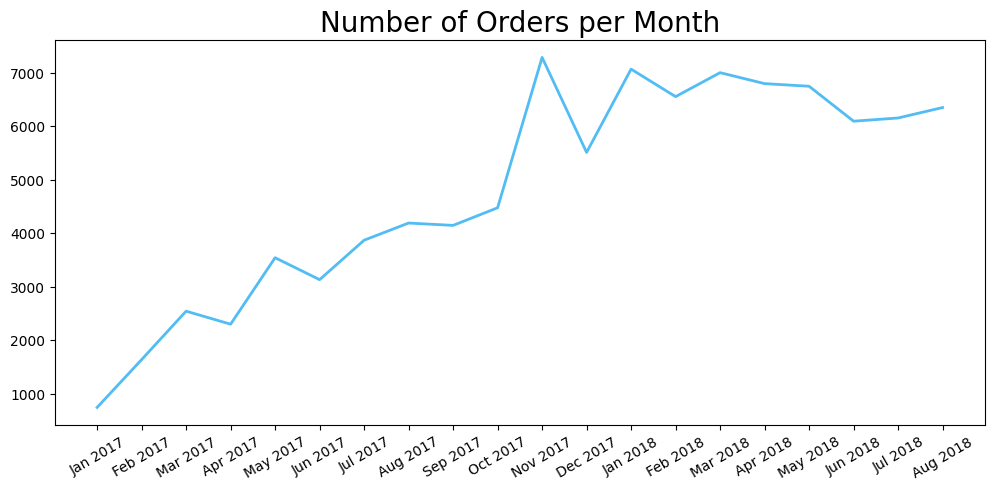

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(
    df_monthly_orders["date"],
    df_monthly_orders["order_count"],
    linewidth=2,
    color="#52BCF4"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.show()

In [63]:
df_monthly_canceled = df_all[df_all['order_status'] == 'canceled'].resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
    })

df_monthly_canceled = df_monthly_canceled.reset_index().rename(columns={
    "order_purchase_timestamp": "date",
    "order_id": "cancel_count",
    "price": "revenue"})

df_monthly_canceled['date'] = df_monthly_canceled['date'].dt.strftime('%b %Y')

df_monthly_canceled.head()

,date,cancel_count,revenue
0,Jan 2017,3,214.60
1,Feb 2017,17,2343.67
2,Mar 2017,33,6002.98
3,Apr 2017,18,6084.25
4,May 2017,29,2970.94


In [64]:
df_monthly_others = df_all[(df_all['order_status'] != 'canceled') & (df_all['order_status'] != 'delivered')].resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
    })

df_monthly_others = df_monthly_others.reset_index().rename(columns={
    "order_purchase_timestamp": "date",
    "order_id": "count",
    "price": "revenue"})

df_monthly_others['date'] = df_monthly_others['date'].dt.strftime('%b %Y')

df_monthly_others.head()

,date,count,revenue
0,Jan 2017,47,8299.91
1,Feb 2017,110,12483.35
2,Mar 2017,103,9142.47
3,Apr 2017,83,24542.48
4,May 2017,125,13911.93


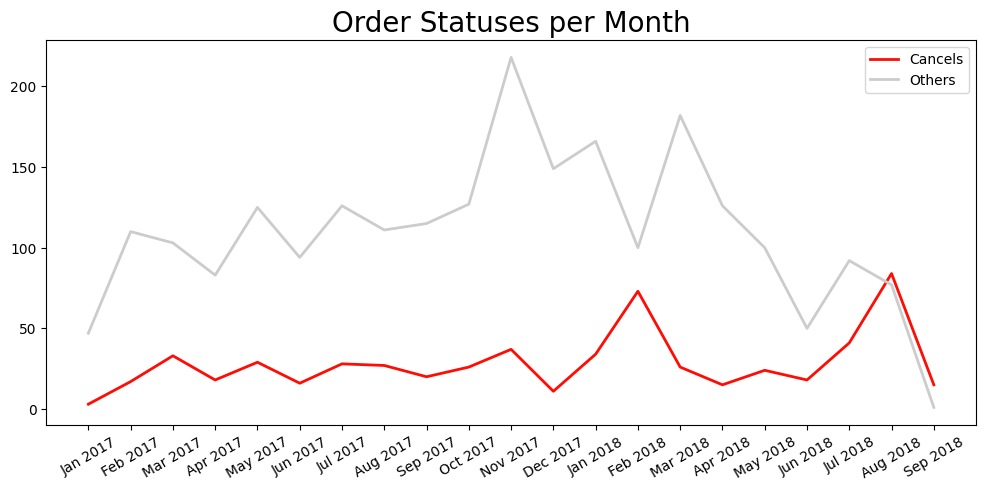

In [65]:
plt.figure(figsize=(12, 5))
plt.plot(
    df_monthly_canceled["date"],
    df_monthly_canceled["cancel_count"],
    linewidth=2,
    color="#FF0C04",
    label = 'Cancels'
)

plt.plot(
    df_monthly_others["date"],
    df_monthly_others["count"],
    linewidth=2,
    color="#CCCCCC",
    label = 'Others'
)

plt.title("Order Statuses per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

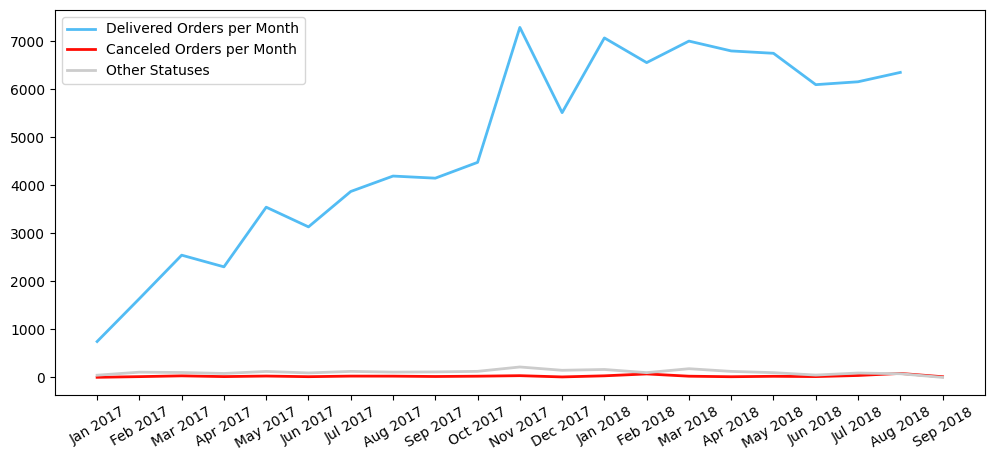

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(
    df_monthly_orders["date"],
    df_monthly_orders["order_count"],

    linewidth=2,
    color="#52BCF4",
    label = 'Delivered Orders per Month'
)

plt.plot(
    df_monthly_canceled["date"],
    df_monthly_canceled["cancel_count"],

    linewidth=2,
    color="#FF0C04",
    label = 'Canceled Orders per Month'
)

plt.plot(
    df_monthly_others["date"],
    df_monthly_others["count"],
    linewidth=2,
    color="#CCCCCC",
    label = 'Other Statuses'
)

plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

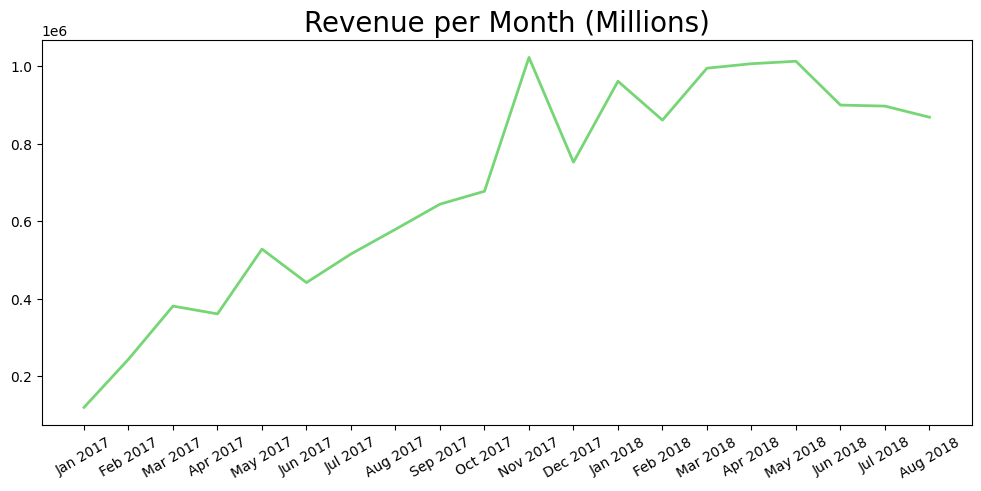

In [67]:
plt.figure(figsize=(12, 5))
plt.plot(
    df_monthly_orders["date"],
    df_monthly_orders["revenue"],
    linewidth=2,
    color="#76d676"
)
plt.title("Revenue per Month (Millions)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.show()

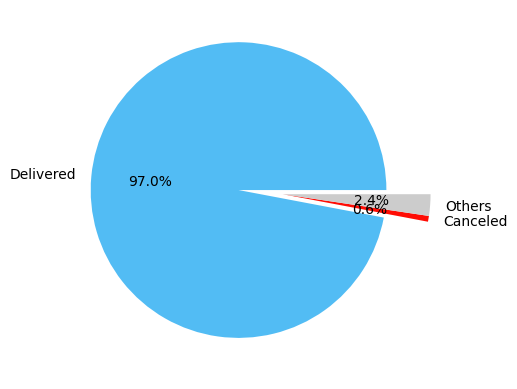

In [68]:
delivered = df_orders[df_orders['order_status'] == 'delivered'].shape[0]
canceled = df_orders[df_orders['order_status'] == 'canceled'].shape[0]
others = df_orders[(df_orders['order_status'] != 'canceled') & (df_orders['order_status'] != 'delivered')].shape[0]
total = delivered + canceled + others

statuses_name = ['Delivered', 'Canceled', 'Others']
statuses_percentage = [delivered/total, canceled/total, others/total]
colors = ['#52BCF4', '#FF0C04', '#CCCCCC']

plt.pie(
    x=statuses_percentage,
    labels=statuses_name,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0.3, 0, 0)
)

plt.show()

### Pertanyaan 2: Kategori apa dengan jumlah penjualan terbanyak

In [69]:
df_orders_sum = df_all[df_all['order_status'] == 'delivered'].groupby(by="product_category_name_english").agg({"product_id": "nunique"}).reset_index().rename(columns={
    "product_category_name_english": "category",
    "product_id": "quantity"
    }).sort_values(by='quantity', ascending=False)

In [70]:
df_orders_sum

,category,quantity
7,bed_bath_table,2986
65,sports_leisure,2811
39,furniture_decor,2558
43,health_beauty,2380
49,housewares,2281
...,...,...
67,tablets_printing_image,9
46,home_comfort_2,5
29,fashion_childrens_clothes,4
61,security_and_services,2


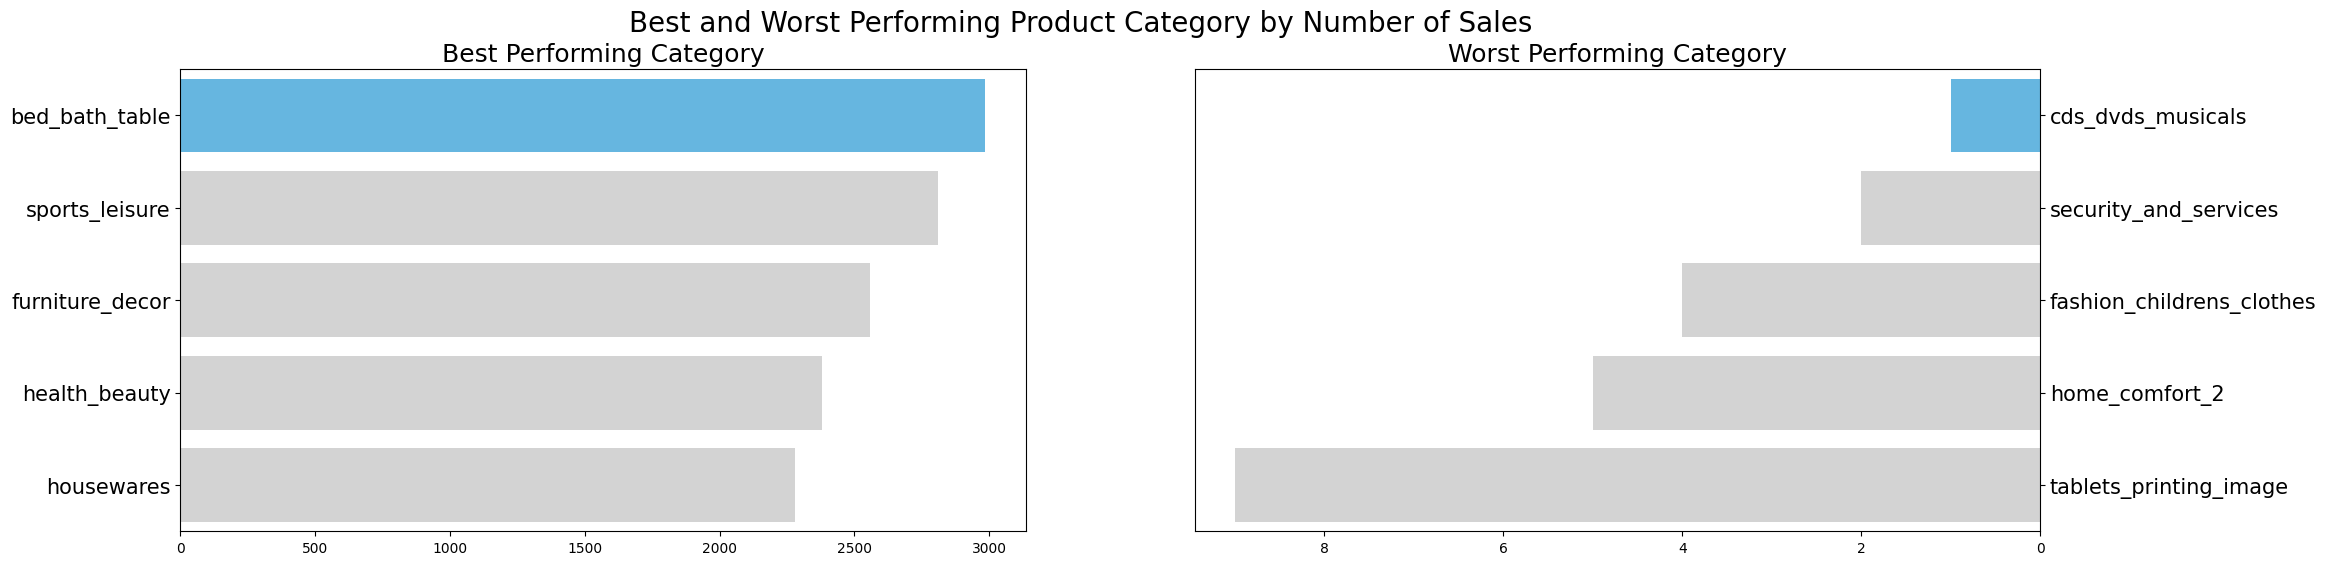

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))


colors = ["#52BCF4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="category", hue="category", data=df_orders_sum.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Category", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity", y="category", hue="category", data=df_orders_sum.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()


### Pertanyaan 3: Bagaimana demografi pembeli

In [72]:
df_customer_state = df_all.groupby(by='customer_state').agg({'customer_id':'nunique'}).rename(columns={
    "customer_state": "state",
    "customer_id": "customer_count"}).sort_values(by='customer_count', ascending=False).reset_index()

In [73]:
df_customer_state.head()

,customer_state,customer_count
0,SP,41616
1,RJ,12793
2,MG,11592
3,RS,5438
4,PR,5025


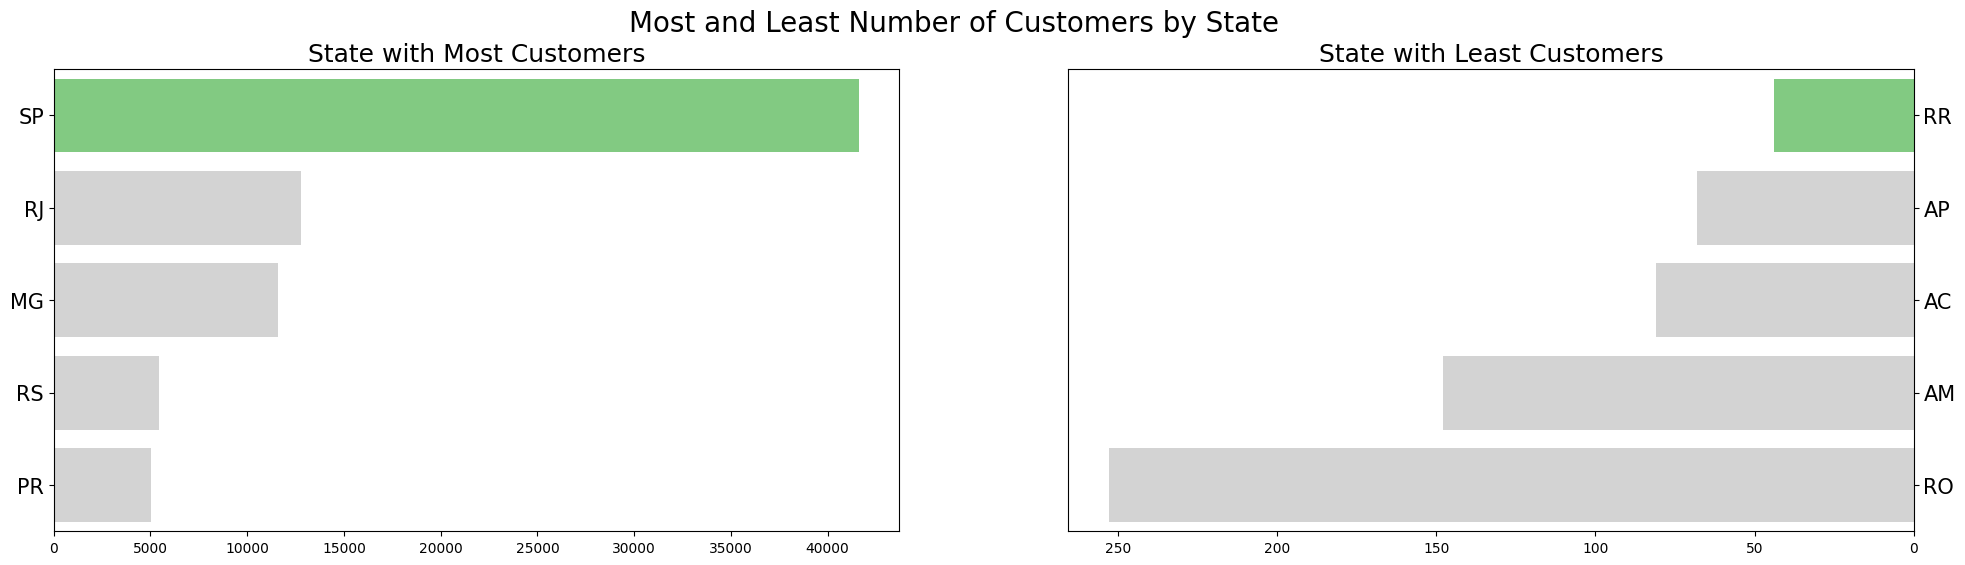

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))


colors = ["#76d676", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", hue="customer_state", data=df_customer_state.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("State with Most Customers", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_count", y="customer_state", hue="customer_state", data=df_customer_state.sort_values(by="customer_count", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("State with Least Customers", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and Least Number of Customers by State", fontsize=20)
plt.show()


## Conclusion

- Conclution pertanyaan 1: Bagaimana performa penjualan di E-Commerce pada tahun 2017 s.d. 2018

Jumlah order terus meningkat sejak Januari 2017. Jumlah terbanyak terjadi naik turun mulai di bulan November 2017, lalu Januari 2018, Maret 2018, dan Mei 2018. Kenaikan jumlah order juga berdampak langsung pada revenue.

 Sepanjang periode, 97% pesanan berhasil diselesaikan. Terdapat order yang dibatalkan (0,6%) juga status-status lain (2,4%) dengan jumlah yang tidak begitu signifikan. Pembatalan pesanan paling banyak terjadi pada bulan Februari 2018.

- Conclution pertanyaan 2: Kategori apa dengan jumlah penjualan terbanyak

Kategori produk _bed_bath_table_ merupakan kategori yang paling laris. Sebaliknya, kategori _cds_dvds_musicals_ merupakan kategori dengan penjualan paling sedikit.

- Conclution pertanyaan 3: Bagaimana demografi pembeli

Pelanggan paling banyak berasal dari negara bagian SP (São Paulo), sedangkan paling sedikit berasal dari negara bagian RR (Roraima)

In [75]:
df_all.to_csv("all_data.csv")